# Agas

## Tutotial

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import agas

sns.set_context('notebook')

def normalize_data(s):
    """Normalize an array of values between 0 and 1.
    """
    return (s - s.min()) / (s.max() - s.min())

In [550]:
A = np.vstack([
    [1, 1, 1, 0],
    [1, 2, 3, 5],
    [6, 9, 9, 9],
    [8, 9, 10, 11]])

maximize_similarity = np.median
maximize_divergence = np.std

In [575]:
indices, scores = agas.pair_from_array(A, maximize_similarity, maximize_divergence, return_filter='all')

In [552]:
agas.pair_from_array(A, maximize_similarity, maximize_divergence, 0.9, 'all')

(array([[2, 3],
        [0, 1],
        [1, 2],
        [1, 3],
        [0, 2],
        [0, 3]], dtype=int64),
 array([0.        , 0.01498934, 0.80199234, 0.84398497, 0.90835061,
        1.        ]))

In [47]:
agas.pair_from_array(A, maximize_similarity, maximize_divergence, 0.1, return_type='values')

array([[ 1,  1,  1,  0],
       [ 8,  9, 10, 11]])

In [41]:
agas.pair_from_array(A, maximize_similarity, maximize_divergence, 0.1, return_type='values')

array([[1, 1, 1, 0],
       [1, 2, 3, 5]])

# Real data example

Load the Data

In [356]:
url = 'https://datahub.io/core/gdp/r/gdp.csv'
df = pd.read_csv(url)
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


Change the unit of Value (GDP) from $ to trillions, for readability

In [357]:
df['Value'] /= 1e12 # Convert from $ to Billion$

Remove the top and bottom 2.5 percentiles

In [358]:
total_per_country = df.groupby('Country Name')['Value'].sum()
non_outliers = total_per_country[total_per_country.between(*total_per_country.quantile([0.025, 0.975]))].index
df = df.loc[df['Country Name'].isin(non_outliers)]

Considerable number of countries have no data until the 1990s:

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Proportion of non-missing data')]

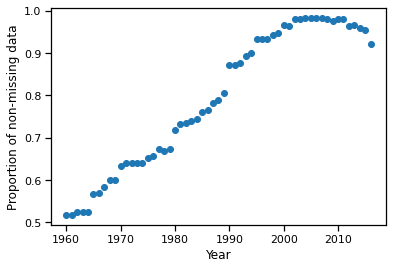

In [359]:
ax = plt.scatter(df['Year'].sort_values().unique(),
            df.groupby('Year')['Country Name'].nunique() / df['Country Name'].nunique())
plt.gca().set(xlabel='Year', ylabel='Proportion of non-missing data')

In [364]:
wide_df = df.loc[df['Year'].gt(1990)].pivot(columns='Year', values='Value', index='Country Name')
wide_df.sample(5, random_state=42)

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Bolivia,0.005343,0.005644,0.005735,0.005981,0.006715,0.007397,0.007926,0.008498,0.008285,0.008398,...,0.013120,0.016674,0.017340,0.019650,0.023963,0.027084,0.030659,0.032996,0.033000,0.033806
Antigua and Barbuda,0.000482,0.000499,0.000535,0.000589,0.000577,0.000634,0.000681,0.000728,0.000766,0.000830,...,0.001311,0.001368,0.001224,0.001152,0.001142,0.001211,0.001193,0.001280,0.001365,0.001460
Monaco,0.002480,0.002737,0.002574,0.002720,0.003130,0.003138,0.002840,0.002935,0.002906,0.002648,...,0.005974,0.006919,0.005557,0.005351,0.006075,NaN,NaN,NaN,NaN,NaN
Sub-Saharan Africa (excluding high income),0.318763,0.313438,0.299561,0.291699,0.336900,0.348322,0.360440,0.339959,0.342288,0.367060,...,0.932288,1.066496,1.021767,1.364845,1.536166,1.610976,1.697106,1.778862,1.604436,1.511168
Virgin Islands (U.S.),0.001671,0.001771,0.001996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004803,0.004250,0.004203,0.004339,0.004239,0.004095,0.003764,0.003624,0.003765,NaN


In [506]:
indices, scores = agas.pair_from_wide_df(wide_df, np.nanstd, np.median, similarity_weight=0.7, return_filter='all')

C:\Users\Eitan Hemed\OneDrive - University of Haifa\PhD\python_projects\agas\agas\_from_numpy.py:249: RuntimeWarning: The result of aggregating the input scores using the function median resulted in 45 NaN scores.
  warnings.warn(f"The result of aggregating the input scores using the "


Select the optimal pair - two entries which are most similar in their variances (`np.nanstd`) and most divergent in their median GDP values (`np.nanmedian`).

In [507]:
wide_df.iloc[indices[0].flatten()]

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
China,0.383373,0.426916,0.444731,0.564325,0.734548,0.863747,0.961604,1.029043,1.093997,1.211347,...,3.552182,4.598206,5.109954,6.100620,7.572554,8.560547,9.607224,10.482372,11.064666,11.199145
United States,6.174043,6.539299,6.878718,7.308755,7.664060,8.100201,8.608515,9.089168,9.660624,10.284779,...,14.477635,14.718582,14.418739,14.964372,15.517926,16.155255,16.691517,17.393103,18.120714,18.624475


Preperations for the plot

In [ ]:
# Aggregated data
sds = normalize_data(wide_df.std(ddof=0, axis=1))
medians = normalize_data(wide_df.mean(axis=1))

# Indices of interesting data points
all_other_indices = np.arange(0, wide_df.index.nunique())
special_scores = [0, scores[scores.size // 2], 1]
special_scores_indices = indices[np.in1d(scores, special_scores)]
all_other_indices = all_other_indices[~np.in1d(all_other_indices, special_scores_indices)]

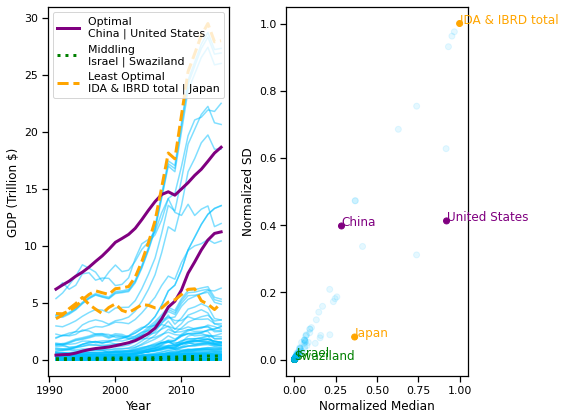

In [546]:
fig, axs = plt.subplots(1, 2, figsize=(8,6 ))
raw_data_ax, norm_aggrgated_data_ax = axs

raw_data_ax.plot(wide_df.iloc[all_other_indices].T, c='deepskyblue', alpha=0.5)
raw_data_ax.set(xlabel='Year', ylabel='GDP (Trillion $)')

colors = np.repeat('deepskyblue', wide_df.shape[0])
alphas = np.ones_like(colors).astype(float) * 0.1

for s, c, lab, ls in zip(special_scores_indices,
                     ['purple', 'green', 'orange'], ['Optimal', 'Middling', 'Least Optimal'],
                     ["solid", "dotted", "dashed" ]):
    labels = wide_df.index[s]
    colors[s] = c
    alphas[s] = 1

    raw_data_ax.plot(wide_df.iloc[s].T, c=c, label= f'{lab} \n' + ' | '.join(labels), lw=3, ls=ls)

    for idx, l in zip(s, labels):
        norm_aggrgated_data_ax.annotate(xy=[medians[idx], sds[idx]], text=l, color=c)

# # Remove duplicate entries in the legend
handles, labels = raw_data_ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
raw_data_ax.legend(by_label.values(), by_label.keys())

norm_aggrgated_data_ax.scatter(medians, sds, c=colors, alpha=alphas)
norm_aggrgated_data_ax.set(xlabel='Normalized Median', ylabel='Normalized SD')

fig.tight_layout()

## Algorithm 

Finding the optimal pair is composed of several steps. The logic is demonstrated here usign a simple example. 

0. Definitions

Let `A` be a matrix of size N X T. Here `A` is a 4 x 4 matrix.

$$ A = \begin{pmatrix} \\ 1 & 1 & 1 & 0 \\ 
    1 & 2 & 3 & 4 \\  9 & 9 & 9 & 9\\ 8 & 9 & 10 & 11
    \end{pmatrix}$$


Let `MX` and `MN` be two functions which given a vector produce a scaler. Here `MX` is the population standard deviation

\begin{equation}
\sigma = \sqrt\frac{\sum{(X-\mu)^2}}{N}
\end{equation}

and `MN` is the median

\begin{cases}
  x_\frac{n+1}{2}                                    & n\text{ odd}\\
  \frac {1}{2}\left(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}\right) & n \text{ even}
\end{cases}


Each of `MX` and `MN` will be applied on the rows of `A`, resulting in the following vectors:

$$ MX(A) = \begin{pmatrix} \\ 0.43 \\ 1.19 \\ 0 \\ 1.19
    \end{pmatrix}$$

$$ MN(A) = \begin{pmatrix} \\ 1 \\ 2.5 \\ 9 \\ 9.5
    \end{pmatrix}$$

Each of MX(A) and MN(A) will be subtracted from itself:

Each of these vectors will be normalized between 0 and 1:

\begin{equation}
x' = \frac{x - \min{x}}{\max{x} - \min{x}}
\end{equation}

Resulting in these two vectors:

$$ Normalized  MX(A) = \begin{pmatrix} \\ 0.39 \\ 1 \\ 0 \\ 1
    \end{pmatrix}$$

$$ Normalized MN(A) = \begin{pmatrix} \\ 0 \\ 0.17 \\ 0.94 \\ 1
    \end{pmatrix}$$

Each of the vectors is multiplied by its respective weight `WMX` and `WMN`, defaulting to 0.5, and they are subtracted from each other:

    \begin{equation}
    $$ wmx * \begin{pmatrix} \\ 0.39 \\ 1 \\ 0 \\ 1 \end{pmatrix} - wmn * \begin{pmatrix} \\ 0 \\ 0.17 \\ 0.94 \\ 1
        \end{pmatrix}$$ = $$  \begin{pmatrix} \\ 0.19 \\ 0.41 \\ -0.47 \\ 0 \end{pmatrix} $$
    \end{equation}

And Normalized once again
    \begin{equation}
    \begin{pmatrix} \\ 0.75 \\ 1 \\ 0 \\ 0.53 \end{pmatrix}
    \end{equation}

